In [1]:
import statsmodels.api as sm
import statsmodels.tsa as tsa
import scipy.stats as sts
import numpy as np
import pandas as pd
import sympy as sp
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

warnings.filterwarnings("ignore")

# Импорт данных

In [2]:
df = pd.read_excel('Тема 10 домашняя работа.xlsx', sheet_name='Лист3').iloc[1:,0:2]
df

,T,IP2_EA_M
1,2014 1,100
2,2,98.7
3,3,107.2
4,4,104.7
5,5,104
...,...,...
93,9,127.2
94,10,133.7
95,11,135.5
96,12,152.4


In [3]:
y_start = df.iloc[:, 1]

In [4]:
df['T, мес'] = np.arange(1, 98, 1)
df

,T,IP2_EA_M,"T, мес"
1,2014 1,100,1
2,2,98.7,2
3,3,107.2,3
4,4,104.7,4
5,5,104,5
...,...,...,...
93,9,127.2,93
94,10,133.7,94
95,11,135.5,95
96,12,152.4,96


# Предварительный анализ

## Временной ряд

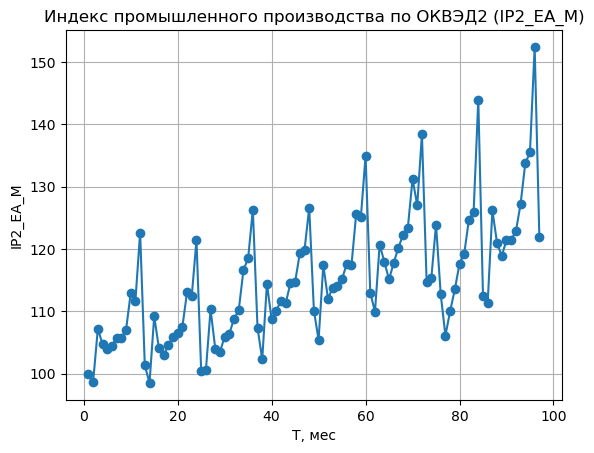

In [6]:
plt.plot(df["T, мес"], df["IP2_EA_M"], marker='o', label="Точки")
plt.xlabel("T, мес")
plt.ylabel("IP2_EA_M")
plt.title("Индекс промышленного производства по ОКВЭД2 (IP2_EA_M)")
plt.grid(True)
plt.show()

Визуально можно выделить наличие сезонности и тренда

## Поиск аномальных значений

### Ящик с усами

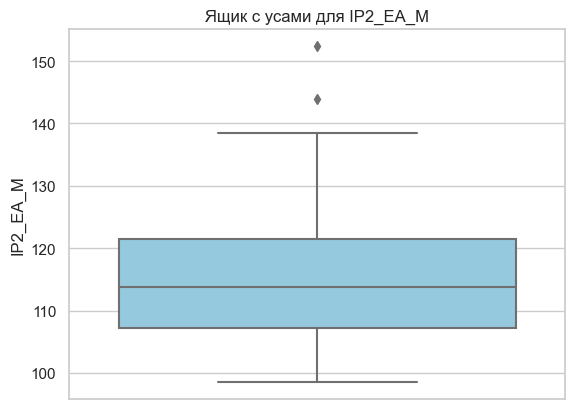

Аномальные значения:
     T IP2_EA_M  T, мес
84  12    143.9      84
96  12    152.4      96


In [7]:
sns.set(style="whitegrid")
sns.boxplot(y=df["IP2_EA_M"], color='skyblue')
plt.ylabel("IP2_EA_M")
plt.title("Ящик с усами для IP2_EA_M")
plt.show()

Q1 = df["IP2_EA_M"].quantile(0.25)
Q3 = df["IP2_EA_M"].quantile(0.75)
IQR = Q3 - Q1
anomalies = df[(df["IP2_EA_M"] < (Q1 - 1.5 * IQR)) | (df["IP2_EA_M"] > (Q3 + 1.5 * IQR))]
print("Аномальные значения:")
print(anomalies)

Аномальные значения при T = 2020 12 и T = 2021 12

### Метод Ирвина

H0: в данных присутствуют аномальные значения\
H1: в данных отстутвуют аномальные значения

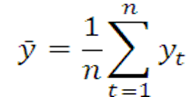
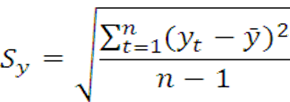

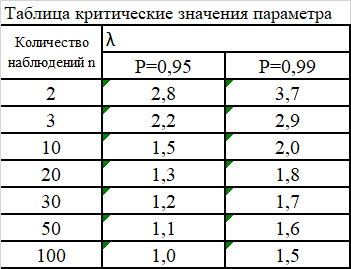

In [8]:
y = np.array(y_start)
n = len(y)
y_ = np.mean(y)
Sy = (sum((y - y_)**2) / (n - 1))**0.5
lambda_cr = 1 + (1.1 - 1)*(n - 50)/50
lambda_cr

1.094

In [9]:
lambda_t = np.array([0] + [abs(y[i-1] - y[i]) / Sy for i in range(1, len(y))])
lambda_t

array([0.        , 0.12879677, 0.84213276, 0.2476861 , 0.06935211,
       0.04953722, 0.11888933, 0.        , 0.12879677, 0.58453921,
       0.11888933, 1.07991142, 2.11028561, 0.27740844, 1.06009653,
       0.50527965, 0.11888933, 0.16842655, 0.12879677, 0.05944467,
       0.09907444, 0.55481687, 0.05944467, 0.88176253, 2.08056328,
       0.00990744, 0.97092953, 0.62416898, 0.04953722, 0.23777866,
       0.04953722, 0.23777866, 0.13870422, 0.63407643, 0.18824144,
       0.77278065, 1.88241439, 0.49537221, 1.19880075, 0.56472432,
       0.13870422, 0.15851911, 0.03962978, 0.31703821, 0.01981489,
       0.45574243, 0.04953722, 0.6737062 , 1.63472829, 0.46564988,
       1.1888933 , 0.53500199, 0.178334  , 0.02972233, 0.10898189,
       0.23777866, 0.01981489, 0.81241042, 0.04953722, 0.97092953,
       2.16973028, 0.30713077, 1.07000397, 0.27740844, 0.27740844,
       0.26750099, 0.23777866, 0.20805633, 0.10898189, 0.77278065,
       0.41611266, 1.12944864, 2.34806427, 0.05944467, 0.85204

In [10]:
df_irvin = df.copy()
df_irvin['lambda_t'] = lambda_t
df_irvin

,T,IP2_EA_M,"T, мес",lambda_t
1,2014 1,100,1,0.000000
2,2,98.7,2,0.128797
3,3,107.2,3,0.842133
4,4,104.7,4,0.247686
5,5,104,5,0.069352
...,...,...,...,...
93,9,127.2,93,0.435928
94,10,133.7,94,0.643984
95,11,135.5,95,0.178334
96,12,152.4,96,1.674358


Выведу аномальные значения

In [12]:
anomalies = df_irvin[df_irvin['lambda_t'] > lambda_cr]
anomalies

,T,IP2_EA_M,"T, мес",lambda_t
13,2015 1,101.3,13,2.110286
25,2016 1,100.4,25,2.080563
37,2017 1,107.3,37,1.882414
39,3,114.4,39,1.198801
49,2018 1,110.1,49,1.634728
51,3,117.4,51,1.188893
61,2019 1,113,61,2.169730
72,12,138.4,72,1.129449
73,2020 1,114.7,73,2.348064
76,4,112.7,76,1.109634


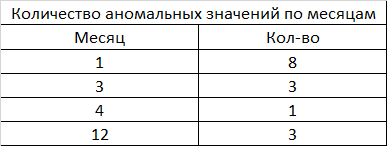

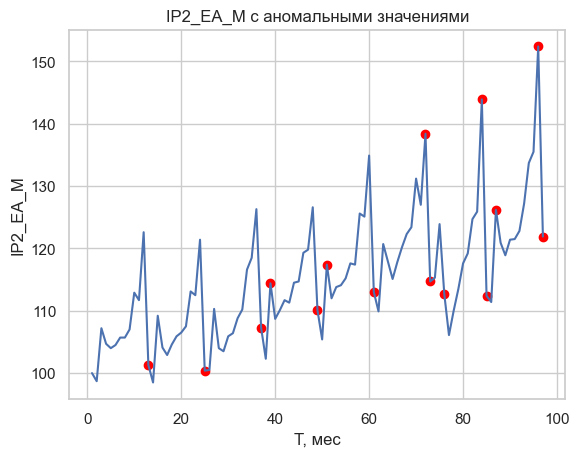

In [16]:
plt.plot(df_irvin["T, мес"], df_irvin["IP2_EA_M"])
for i in range(anomalies.shape[0]):
    plt.scatter(anomalies.iloc[i, 2], anomalies.iloc[i, 1], color='red', label='Anomaly')
plt.xlabel("T, мес")
plt.ylabel("IP2_EA_M")
plt.title("IP2_EA_M с аномальными значениями")
plt.grid(True)

plt.show()

###### Вывод: целесообразно заменять только аномалию при T = 2020 4, т.к. в данном месяце за все время она происходила только один раз и к тому же в это время происходило экстроординарное событие - Коронавирус

###### Другие аномалии не нужно удалять, т.к. они показывают сезонность. Аномальные пиковые значения отражают объективоное развитие процесса

### Метод Стьюдента

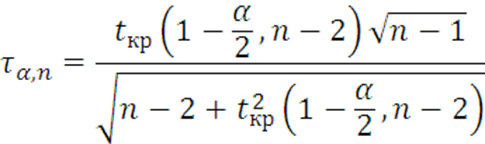
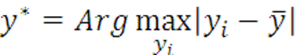
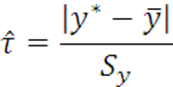

In [17]:
n = len(y)
y_ = np.mean(y)
Sy = (sum((y - y_)**2) / (n - 1))**0.5
t_cr_1 = sts.t.isf(0.001/2, n-2)
t_cr_2 = sts.t.isf(0.05/2, n-2)
tau_0001 = (t_cr_1 * (n-1)**0.5) / (n - 2 + t_cr_1**2)**0.5
tau_005 = (t_cr_2 * (n-1)**0.5) / (n - 2 + t_cr_2**2)**0.5
tau_0001, tau_005

(3.2236701556359075, 1.9555206515894046)

In [18]:
t_hat = np.array([abs(j - y_)/Sy for j in y])
t_hat

array([1.49479841e+00, 1.62359518e+00, 7.81462427e-01, 1.02914853e+00,
       1.09850064e+00, 1.04896342e+00, 9.30074090e-01, 9.30074090e-01,
       8.01277315e-01, 2.16738109e-01, 3.35627439e-01, 7.44283977e-01,
       1.36600163e+00, 1.64341007e+00, 5.83313543e-01, 1.08859320e+00,
       1.20748253e+00, 1.03905598e+00, 9.10259201e-01, 8.50814536e-01,
       7.51740094e-01, 1.96923220e-01, 2.56367885e-01, 6.25394646e-01,
       1.45516863e+00, 1.44526119e+00, 4.74331657e-01, 1.09850064e+00,
       1.14803786e+00, 9.10259201e-01, 8.60721980e-01, 6.22943320e-01,
       4.84239102e-01, 1.49837326e-01, 3.38078765e-01, 1.11085941e+00,
       7.71554983e-01, 1.26692719e+00, 6.81264461e-02, 6.32850764e-01,
       4.94146546e-01, 3.35627439e-01, 3.75257216e-01, 5.82190019e-02,
       3.84041135e-02, 4.17338319e-01, 4.66875540e-01, 1.14058174e+00,
       4.94146546e-01, 9.59796422e-01, 2.29096879e-01, 3.05905106e-01,
       1.27571111e-01, 9.78487786e-02, 1.11331074e-02, 2.48911768e-01,
      

t_hat < tau_005 - Не аномальное значение\
tau_005 =< t_hat =< tau_0001 - Нельзя определить (используются другие методы)\
t_hat > tau_0001 - Аномальное значение

In [19]:
df_student = df.copy()
df_student['t^'] = t_hat
df_student

,T,IP2_EA_M,"T, мес",t^
1,2014 1,100,1,1.494798
2,2,98.7,2,1.623595
3,3,107.2,3,0.781462
4,4,104.7,4,1.029149
5,5,104,5,1.098501
...,...,...,...,...
93,9,127.2,93,1.200026
94,10,133.7,94,1.844010
95,11,135.5,95,2.022344
96,12,152.4,96,3.696702


In [20]:
anomalies = df_student[df_student['t^'] > tau_0001]
anomalies

,T,IP2_EA_M,"T, мес",t^
96,12,152.4,96,3.696702


In [21]:
controversial = df_student[(df_student['t^'] >= tau_005) & (tau_0001 >= df_student['t^'])]
controversial

,T,IP2_EA_M,"T, мес",t^
60,12,134.9,60,1.962900
72,12,138.4,72,2.309660
84,12,143.9,84,2.854570
95,11,135.5,95,2.022344


**Вывод: по методу Стьюдента аномальным значением является только при T = 2021 12. Но его нельзя заменять, т.к. оно отражает объективное развитие процесса**

**Значиние при T = 2020 4 по методу Стьюдента было признано не аномальным. Значит его заменять не буду**

**Вывод: исходя из метода Ирвина, метода Стьюдента и объективного смысла, ни одно аномальное значение удаляться или заменяться не будет**

## Проверка наличия тренда

### Метод проверки разности средних уровней 

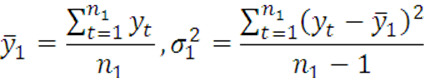
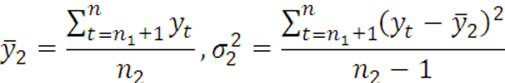
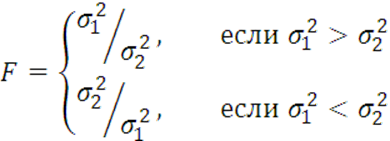
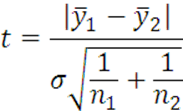
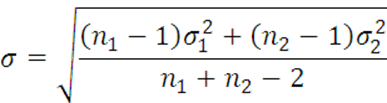

H0: дисперсии равны\
H1: дисперсии не равны

In [22]:
n1 = int(n/2)
n2 = n - n1
y1_ = y[:n1].mean()
y2_ = y[n1:].mean()
var_1 = y[:n1].var(ddof=1)
var_2 = y[n1:].var(ddof=1)
F = max(var_2, var_1)/min(var_1, var_2)
F_cr = sts.f.isf(0.05, n1-1, n2-1)
F, F_cr

(1.821586775918009, 1.618422896995447)

In [23]:
if F > F_cr:
    print("H0 отклоняется")
else:
    print("H0 не отклоняется")

H0 отклоняется


**Вывод: данный метод для определения наличия тренда ответа не дает**

### Критерий серий, основанный на медиане 

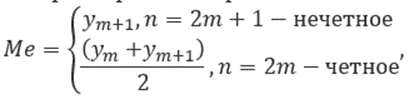
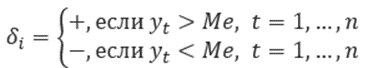
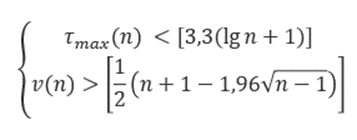

H0: тренд отсутствует\
H1: тренд присутствует

In [24]:
n = len(y)
m = int(n/2)
Me = np.median(y)
Me

113.8

In [25]:
null_one = np.array(y > Me)
count = 1
counts_list = []
for i in range(1,len(null_one)):
    if null_one[i-1] == null_one[i]:
        count += 1
    else:
        counts_list.append(count)
        count = 1
counts_list.append(count)
counts_list

[11, 1, 11, 1, 9, 3, 2, 1, 4, 5, 2, 1, 2, 7, 2, 13, 4, 5, 2, 11]

In [26]:
v_n = len(counts_list)
tau_max_n = max(counts_list)
lg_n = np.log(n) / np.log(10)
first_eq = 3.3*(lg_n + 1)
second_eq = 1/2 * (n + 1 - 1.96 * (n-1) ** 0.5)
first_eq, second_eq

(9.856346723078607, 39.39800020828994)

In [27]:
if (tau_max_n < first_eq) and (v_n > second_eq):
    print("H0 не отклоняется")
else:
    print("H0 отклоняется")

H0 отклоняется


**Вывод: исходя из критерия серий, основанного на медиане, тренд в данных присутсвует**

## Сглаживание временных рядов

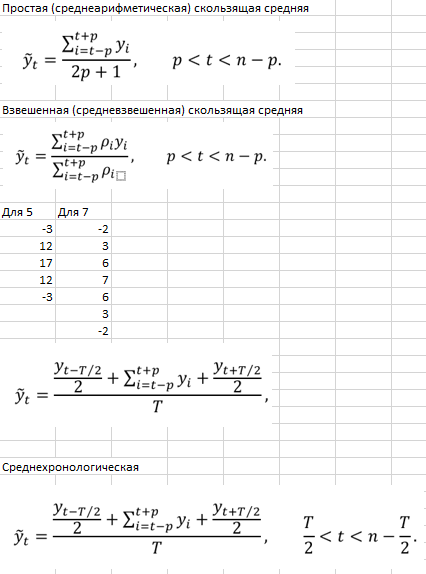

In [28]:
# Простая скользящая средняя с периодом 12
simple_ma_12 = np.array(df['IP2_EA_M'].rolling(window=12).mean())

# Взвешенные скользящие средние с периодами 5 и 7
weights_5 = np.array([-3, 12, 17, 12, -3])
weights_7 = np.array([-2, 3, 6, 7, 6, 3, -2])
weighted_ma_5 = np.array(df['IP2_EA_M'].rolling(window=5).apply(lambda x: np.dot(x, weights_5)/np.sum(weights_5)))
weighted_ma_7 = np.array(df['IP2_EA_M'].rolling(window=7).apply(lambda x: np.dot(x, weights_7)/np.sum(weights_7)))

# Среднехронологическая
T = 12
n = 97
t = 7
mean_hron_12 = []
for i in range(t, len(df['IP2_EA_M'])-t+2):
    a = df['IP2_EA_M'][i-T/2]/2
    b = sum(df['IP2_EA_M'][int(i-T/2):int(i+T/2-1)])
    c = df['IP2_EA_M'][i+T/2]/2
    mean_hron_12.append((a+b+c)/T)
mean_hron_12 = np.array(mean_hron_12)
mean_hron_12_with_nan = np.pad(mean_hron_12, (6, 6), 
                               mode='constant', constant_values=(None, None))

# Эксп. сглаживание
smoothed_y = df['IP2_EA_M'].ewm(alpha=0.2, adjust=False).mean()

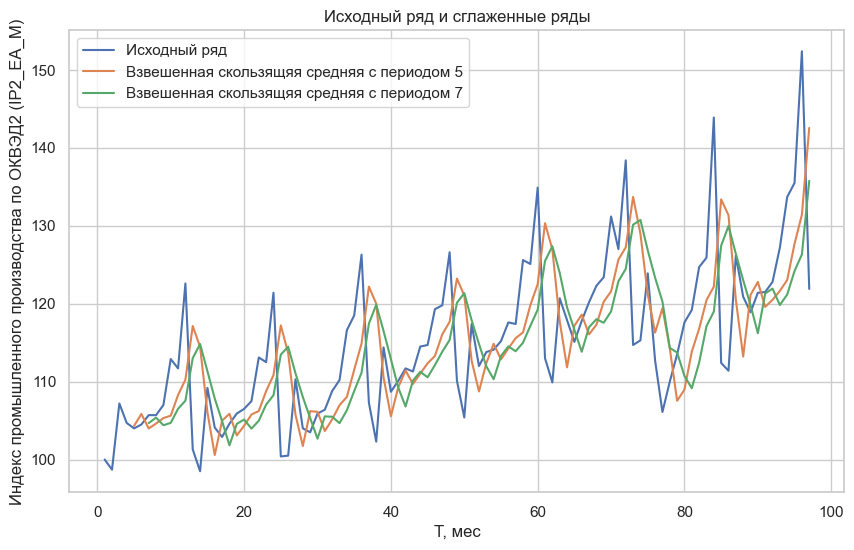

In [29]:
plt.figure(figsize=(10, 6))
plt.plot(np.array(df['T, мес']), np.array(y), label='Исходный ряд')
plt.plot(np.array(df['T, мес']), weighted_ma_5, label='Взвешенная скользящяя средняя с периодом 5')
plt.plot(np.array(df['T, мес']), weighted_ma_7, label='Взвешенная скользящяя средняя с периодом 7')

plt.title('Исходный ряд и сглаженные ряды')
plt.xlabel('T, мес')
plt.ylabel('Индекс промышленного производства по ОКВЭД2 (IP2_EA_M)')
plt.legend()
plt.show()

Взвешенные скользящие средние плохо сглаживают предложенные данные

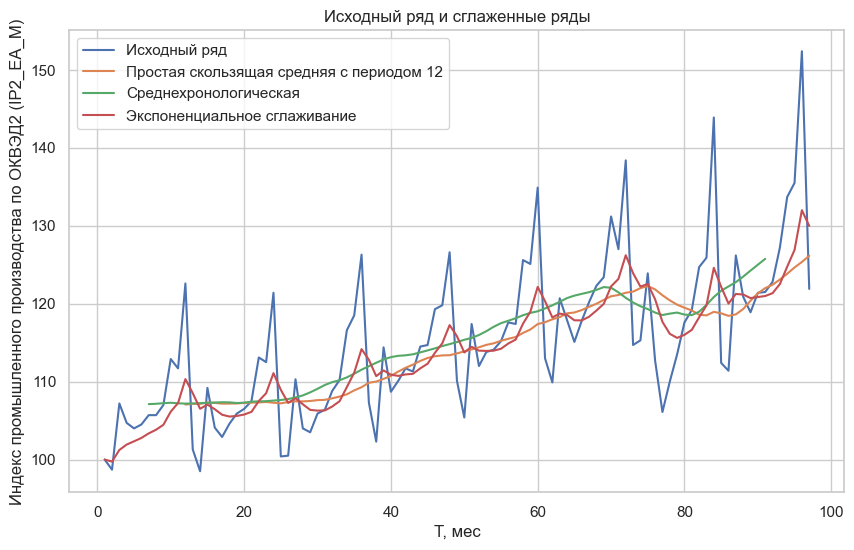

In [30]:
plt.figure(figsize=(10, 6))
plt.plot(np.array(df['T, мес']), np.array(y), label='Исходный ряд')
plt.plot(np.array(df['T, мес']), simple_ma_12, label='Простая скользящая средняя с периодом 12')
plt.plot(np.array(df['T, мес']), mean_hron_12_with_nan, label='Среднехронологическая')
plt.plot(np.array(df['T, мес']), smoothed_y, label='Экспоненциальное сглаживание')


plt.title('Исходный ряд и сглаженные ряды')
plt.xlabel('T, мес')
plt.ylabel('Индекс промышленного производства по ОКВЭД2 (IP2_EA_M)')
plt.legend()
plt.show()

**Вывод: лучше всего данные сглаживает экспоненциальное сглаживание, т.к. оно не теряет начальные и конечные, поэтому оно будет давать более точные результаты в отличие от остальных скользящих**

# № 1
**Выбрать кривую роста. Обосновать выбор.**

Буду сравнивать кривые роста без предела роста, т.к. описываемый процесс с мнонтонным характером тенденции развития и без пределов роста

In [31]:
df['IP2_EA_M'] = smoothed_y
df.head()

,T,IP2_EA_M,"T, мес"
1,2014 1,100.00000,1
2,2,99.74000,2
3,3,101.23200,3
4,4,101.92560,4
5,5,102.34048,5


In [32]:
df['(T,мес)^2'] = df['T, мес']**2
df['(T,мес)^3'] = df['T, мес']**3
df

,T,IP2_EA_M,"T, мес","(T,мес)^2","(T,мес)^3"
1,2014 1,100.000000,1,1,1
2,2,99.740000,2,4,8
3,3,101.232000,3,9,27
4,4,101.925600,4,16,64
5,5,102.340480,5,25,125
...,...,...,...,...,...
93,9,122.520188,93,8649,804357
94,10,124.756151,94,8836,830584
95,11,126.904921,95,9025,857375
96,12,132.003936,96,9216,884736


In [33]:
#Линейная
x = df.iloc[:n, 2]
y = df.iloc[:n, 1].astype(float)
X = sm.add_constant(x)
model_1 = sm.OLS(y, X, hasconst = True).fit()

#Полином второй степени
x = df.iloc[:n, 2:4]
y = df.iloc[:n, 1].astype(float)
X = sm.add_constant(x)
model_2 = sm.OLS(y, X, hasconst = True).fit()

#Полином третьей степени
x = df.iloc[:n, 2:]
y = df.iloc[:n, 1].astype(float)
X = sm.add_constant(x)
model_3 = sm.OLS(y, X, hasconst = True).fit()

#Логарифмическая
x = np.log(df.iloc[:n, 2])
y = df.iloc[:n, 1].astype(float)
X = sm.add_constant(x)
model_l = sm.OLS(y, X, hasconst = True).fit()

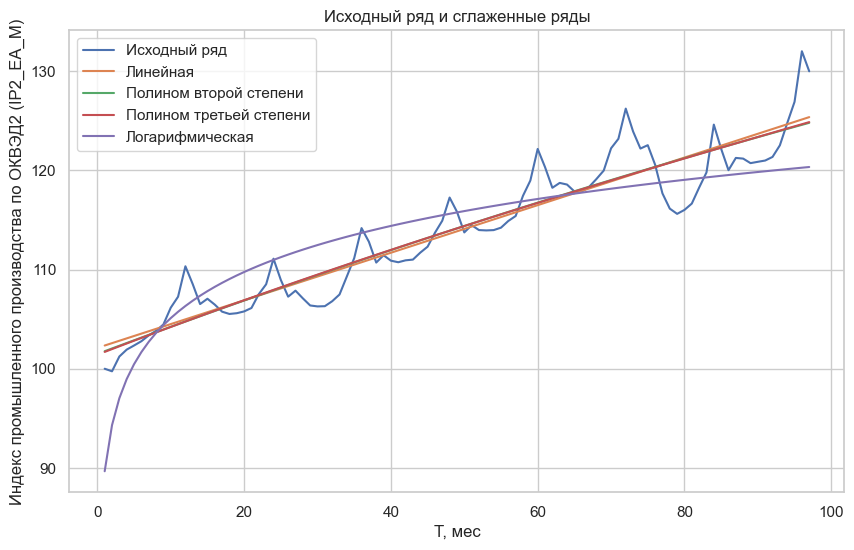

In [34]:
plt.figure(figsize=(10, 6))
plt.plot(np.array(df['T, мес']), np.array(y), label='Исходный ряд')
plt.plot(np.array(df['T, мес']), model_1.predict(), label='Линейная')
plt.plot(np.array(df['T, мес']), model_2.predict(), label='Полином второй степени')
plt.plot(np.array(df['T, мес']), model_3.predict(), label='Полином третьей степени')
plt.plot(np.array(df['T, мес']), model_l.predict(), label='Логарифмическая')

plt.title('Исходный ряд и кривые роста')
plt.xlabel('T, мес')
plt.ylabel('Индекс промышленного производства по ОКВЭД2 (IP2_EA_M)')
plt.legend()
plt.show()

По графику видно линейная и полиномиальные кривые показывают примерно одинаковый результат.\
Логарифмическая кривая роста к предложенным данным не подходит.

In [35]:
print('Линейная')
print('ESS =', model_1.ssr)
print('Полином второй степени')
print('ESS =', model_2.ssr)
print('Полином третьей степени')
print('ESS =', model_3.ssr)

Линейная
ESS = 605.029933066127
Полином второй степени
ESS = 598.2242344958852
Полином третьей степени
ESS = 598.145976124666


Минимальная сумма квадратов отклонений фактических значений уровней от расчетных у полинома третьего порядка.\
У полинома второго порядка сумма больше всего на 0,078, но модель проще, чем полином 3 порядка.\
**Вывод: в качестве кривой роста возьму полином второго порядка**

In [36]:
print(model_2.summary2())

                 Results: Ordinary least squares
Model:              OLS              Adj. R-squared:     0.877   
Dependent Variable: IP2_EA_M         AIC:                457.7418
Date:               2024-03-19 21:49 BIC:                465.4659
No. Observations:   97               Log-Likelihood:     -225.87 
Df Model:           2                F-statistic:        344.2   
Df Residuals:       94               Prob (F-statistic): 5.56e-44
R-squared:          0.880            Scale:              6.3641  
------------------------------------------------------------------
            Coef.    Std.Err.     t      P>|t|    [0.025   0.975] 
------------------------------------------------------------------
const      101.4884    0.7845  129.3589  0.0000  99.9307  103.0461
T, мес       0.2769    0.0370    7.4922  0.0000   0.2035    0.3502
(T,мес)^2   -0.0004    0.0004   -1.0341  0.3037  -0.0011    0.0003
-----------------------------------------------------------------
Omnibus:             

In [38]:
sigma = model_2.scale**0.5
sigma

2.5227143320281145

Уравнение регрессии:

$y_t = a_0 + a_1*t_i + a_2*t_i^2 + \varepsilon_i$

$y_t =101.4884 + 0.2769*t - 0.0004*t^2 + \varepsilon_i \\
\sigma = 2.5236 \\
\sigma_{a_0} = 0.7845 \\
\sigma_{a_1} = 0.037 \\
\sigma_{a_2} = 0.0004
$

# № 2  
**Провести прогнозирование с помощью кривой роста. Рассчитать точечный и интервальный прогноз на 4 периода вперед.**

In [39]:
df = df.drop(['(T,мес)^3'], axis = 1)

### Точечный прогноз

In [40]:
params_ = np.array(model_2.params)

In [41]:
forecast = []
for k in range(1,5):
    y_hat = (np.array([len(y)+k, (len(y)+k)**2])*params_[1:]).sum() + params_[0]
    forecast.append(y_hat)
    print(f'Прогнозное значение для 2022, {k+1} = {y_hat}')

Прогнозное значение для 2022, 2 = 124.99222752774149
Прогнозное значение для 2022, 3 = 125.19466061299326
Прогнозное значение для 2022, 4 = 125.39633810392993
Прогнозное значение для 2022, 5 = 125.5972600005515


In [42]:
y_with_nan = np.pad(y, (0, 4), mode='constant', constant_values=(None, None))
forecast_with_nan = np.pad(forecast, (len(y_with_nan)-4, 0), 
                               mode='constant', constant_values=(None, None))

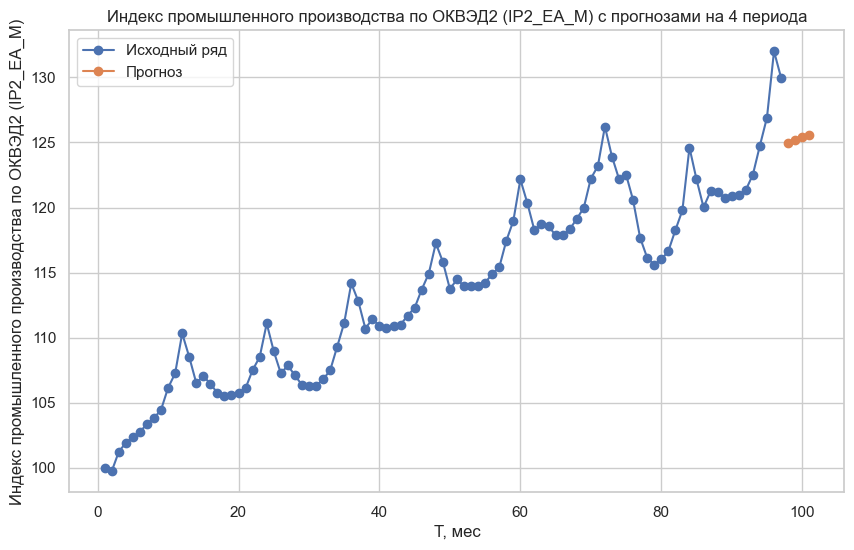

In [43]:
plt.figure(figsize=(10, 6))
plt.plot(np.arange(1, 102, 1), y_with_nan, label='Исходный ряд', marker='o')
plt.plot(np.arange(1, 102, 1), forecast_with_nan, label='Прогноз', marker='o')

plt.title('Индекс промышленного производства по ОКВЭД2 (IP2_EA_M) с прогнозами на 4 периода')
plt.xlabel('T, мес')
plt.ylabel('Индекс промышленного производства по ОКВЭД2 (IP2_EA_M)')
plt.legend()
plt.show()

### Интервальный прогноз

Т.к. модель нелинейная
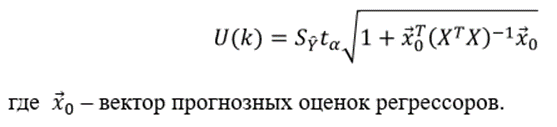
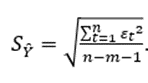

In [44]:
n = len(y)
Sy_hat = sigma
t_alpha = sts.t.isf(0.05/2, n-3)
t_alpha

1.9855234417658303

In [45]:
X_Matrix = sp.Matrix(df.iloc[:,2:])
Eq = (X_Matrix.T * X_Matrix)**(-1)
Eq

Matrix([
[370721/7157333568,    -1/1505856],
[       -1/1505856, 65/7157333568]])

In [46]:
for k in range(1,5):
    y_hat = (np.array([len(y)+k, (len(y)+k)**2])*params_[1:]).sum() + params_[0]
    x_vect = sp.Matrix([len(y)+k, (len(y)+k)**2])
    U = Sy_hat * t_alpha * (1 + float((x_vect.T * Eq * x_vect)[0]))**0.5
    above = y_hat + U
    below = y_hat - U
    print('------------------------')
    print('Верхняя граница = ', above)
    print(f'Прогнозное значение для 2022, {k+1} = {y_hat}')
    print('Нижняя граница = ', below)

------------------------
Верхняя граница =  130.20982570276075
Прогнозное значение для 2022, 2 = 124.99222752774149
Нижняя граница =  119.77462935272222
------------------------
Верхняя граница =  130.4272936513712
Прогнозное значение для 2022, 3 = 125.19466061299326
Нижняя граница =  119.96202757461532
------------------------
Верхняя граница =  130.64487793009664
Прогнозное значение для 2022, 4 = 125.39633810392993
Нижняя граница =  120.14779827776321
------------------------
Верхняя граница =  130.86260331942978
Прогнозное значение для 2022, 5 = 125.5972600005515
Нижняя граница =  120.33191668167322


# № 3 
**Осуществить прогнозирование с применением адаптивной модели прогнозирования Брауна.**

# Адаптивная модель прогнозирования Брауна

In [47]:
# 1 Этап
n = 5
x = df.iloc[:n, 2:]
y = df.iloc[:n, 1].astype(float)
X = sm.add_constant(x)
model = sm.OLS(y, X, hasconst = True).fit()
params_ = np.array(model.params)
params_

array([9.92633280e+01, 4.50358857e-01, 3.93828571e-02])

In [48]:
# 2 Этап
y_hat = (np.array(df.iloc[n, 2:])*params_[1:]).sum() + params_[0]
y_hat

103.38326400000005

In [49]:
# 3 Этап
y_real =  np.array(df.iloc[n, 1])
error = y_real - y_hat
error

-0.6108800000000372

In [50]:
# 4,5 Этапы
beta = 0.986
sum_abs_errors = abs(error)
for k in range(n+1, len(y_start)):
    a0 = params_[0]
    a1 = params_[1]
    a2 = params_[2]
    a0_new = a0 + a1 + a2 + (1 - beta)**2 * error
    a1_new = a1 + a2 + (1 - beta)**2 * error
    a2_new = a2 + (1 - beta)**2 * error
    params_ = np.array([a0_new, a1_new, a2_new])
    y_hat = (np.array(df.iloc[k, 2:])*params_[1:]).sum() + params_[0]
    y_real =  np.array(df.iloc[k, 1])
    error = y_real - y_hat
    sum_abs_errors += abs(error)
print(sum_abs_errors)

540.4380245684846


In [52]:
# Прогноз
beta = 0.986
for k in range(1, 3):
    a0 = params_[0]
    a1 = params_[1]
    a2 = params_[2]
    a0_new = a0 + a1 + a2 + (1 - beta)**2 * error
    a1_new = a1 + a2 + (1F - beta)**2 * error
    a2_new = a2 + (1 - beta)**2 * error
    params_ = np.array([a0_new, a1_new, a2_new])
    y_hat = (np.array([len(y_start)+k, (len(y_start)+k)**2])*params_[1:]).sum() + params_[0]
    error = 0
    print(f'Прогнозное значение для 2022, {k+1} = {y_hat}')

Прогнозное значение для 2022, 2 = 124.72701033238546
Прогнозное значение для 2022, 3 = 124.38453337631566


Бета подбиралась исходя из суммы ошибки прогнозирования и адекватности полученных прогнозов

# № 4

**Моделирование тренд-сезонных процессов. Применить Модель Хольта-Уинтерса**

# Модель Хольта-Уинтерса 

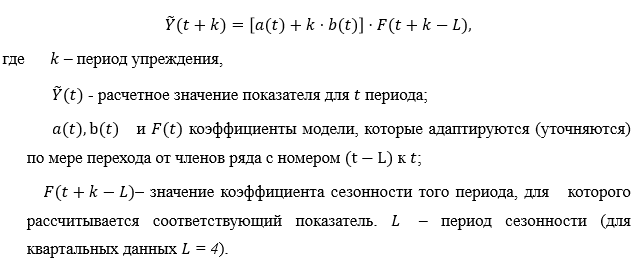
a(t) - новая сглаженная величина\
b(t) - оценка тренда\
F(t) - оценка сезонности
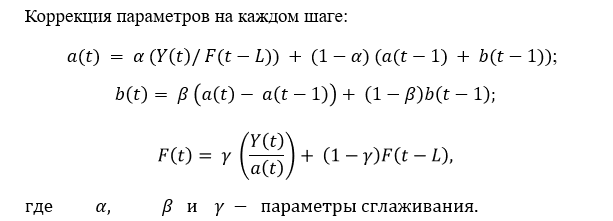

In [53]:
y = df.iloc[:, 1].astype(float)
train = y[:round(len(y)*0.95)] #Тренировочные данные
len(train)

92

Построю модели с разными типами функциональной зависимости.\
Сравнивать модели буду по сумме квадратов отклонений фактических значений уровней от расчетных.\
У какой модели эта сумма будет минимальной, той модели отдам предпочтение.

##### Аддитивная модель

In [54]:
model_1 = tsa.holtwinters.ExponentialSmoothing(train, seasonal_periods=12,
                                                 trend='add', seasonal='add').fit()

In [55]:
forecast_1 = model_1.forecast(len(y) - len(train))
forecast_1

93    121.960146
94    123.720803
95    125.065110
96    128.265179
97    126.424166
dtype: float64

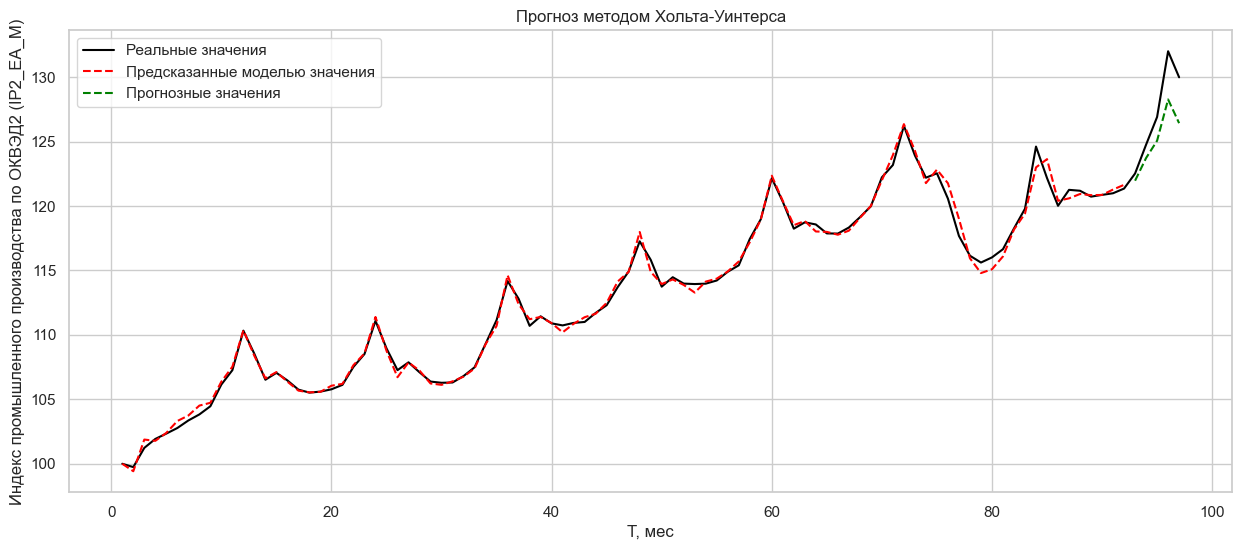

In [56]:
ax = y.plot(figsize=(15, 6), color = 'black', title="Прогноз методом Хольта-Уинтерса", label='Реальные значения')
model_1.fittedvalues.plot(ax=ax, style='--', color = 'red', label='Предсказанные моделью значения')
forecast_1.plot(ax=ax, style='--', color = 'green', label='Прогнозные значения')
plt.xlabel('T, мес')
plt.ylabel('Индекс промышленного производства по ОКВЭД2 (IP2_EA_M)')
plt.legend();

In [57]:
sum_sq_errors_1 = (np.array(y[len(train):] - forecast_1)**2).sum()
sum_sq_errors_1

31.415162772618462

##### Мультипликативная модель

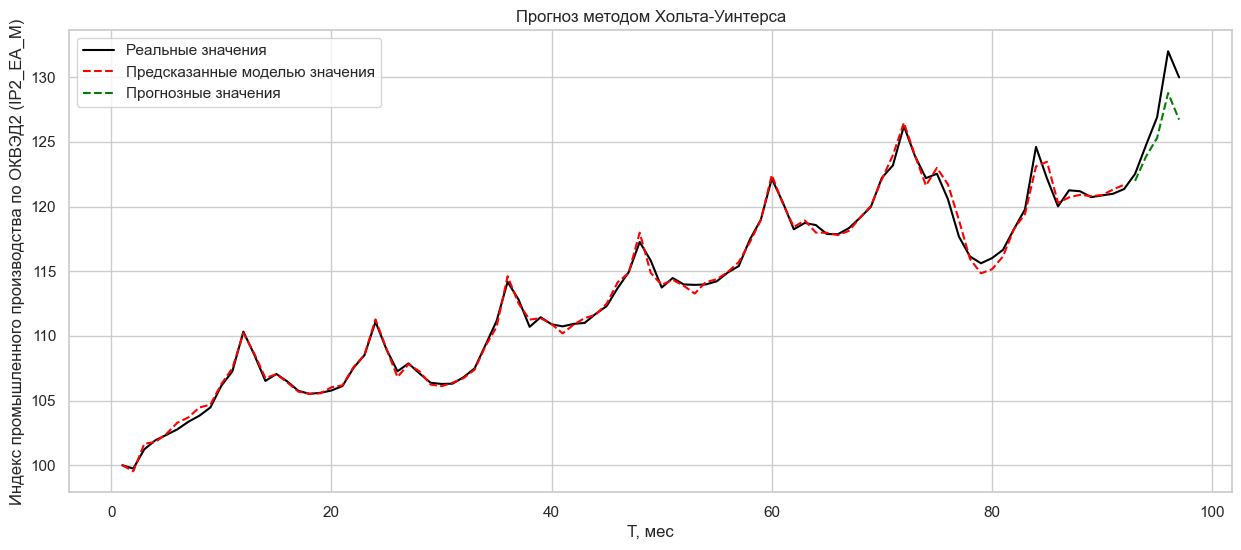

In [58]:
model_2 = tsa.holtwinters.ExponentialSmoothing(train, seasonal_periods=12,
                                                 trend='mul', seasonal='mul').fit()
forecast_2 = model_2.forecast(len(y) - len(train))

ax = y.plot(figsize=(15, 6), color = 'black', title="Прогноз методом Хольта-Уинтерса", label='Реальные значения')
model_2.fittedvalues.plot(ax=ax, style='--', color = 'red', label='Предсказанные моделью значения')
forecast_2.plot(ax=ax, style='--', color = 'green', label='Прогнозные значения')
plt.xlabel('T, мес')
plt.ylabel('Индекс промышленного производства по ОКВЭД2 (IP2_EA_M)')
plt.legend();

In [59]:
sum_sq_errors_2 = (np.array(y[len(train):] - forecast_2)**2).sum()
sum_sq_errors_2

24.74329073620619

##### Модель смешанного типа 1

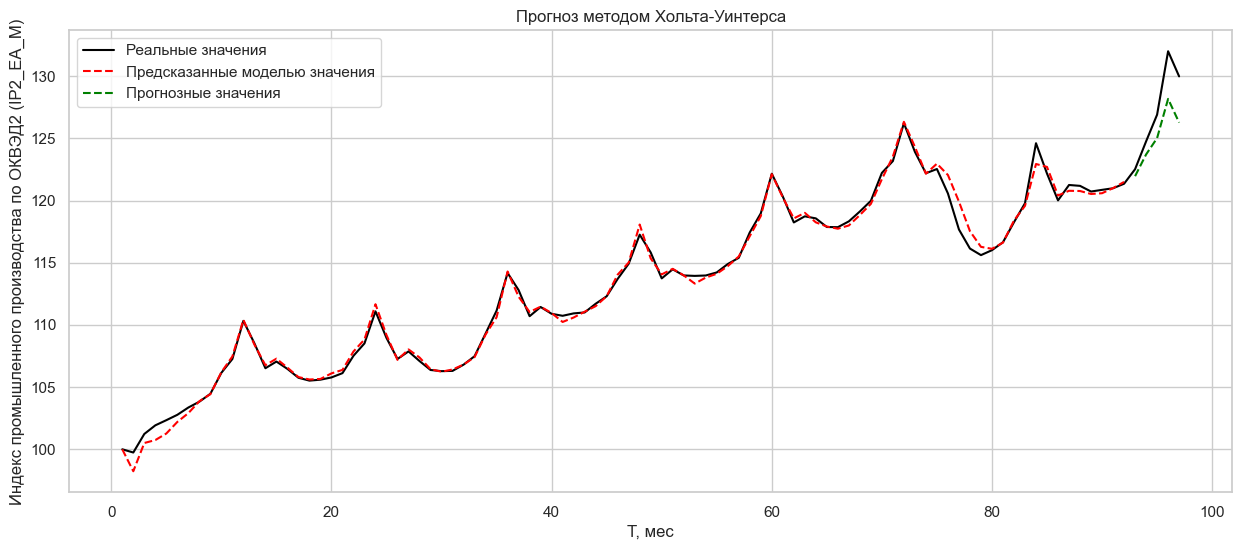

In [60]:
model_3 = tsa.holtwinters.ExponentialSmoothing(train, seasonal_periods=12,
                                                 trend='mul', seasonal='add').fit()
forecast_3 = model_3.forecast(len(y) - len(train))

ax = y.plot(figsize=(15, 6), color = 'black', title="Прогноз методом Хольта-Уинтерса", label='Реальные значения')
model_3.fittedvalues.plot(ax=ax, style='--', color = 'red', label='Предсказанные моделью значения')
forecast_3.plot(ax=ax, style='--', color = 'green', label='Прогнозные значения')
plt.xlabel('T, мес')
plt.ylabel('Индекс промышленного производства по ОКВЭД2 (IP2_EA_M)')
plt.legend();

In [61]:
sum_sq_errors_3 = (np.array(y[len(train):] - forecast_3)**2).sum()
sum_sq_errors_3

33.424576316137724

##### Модель смешанного типа 2

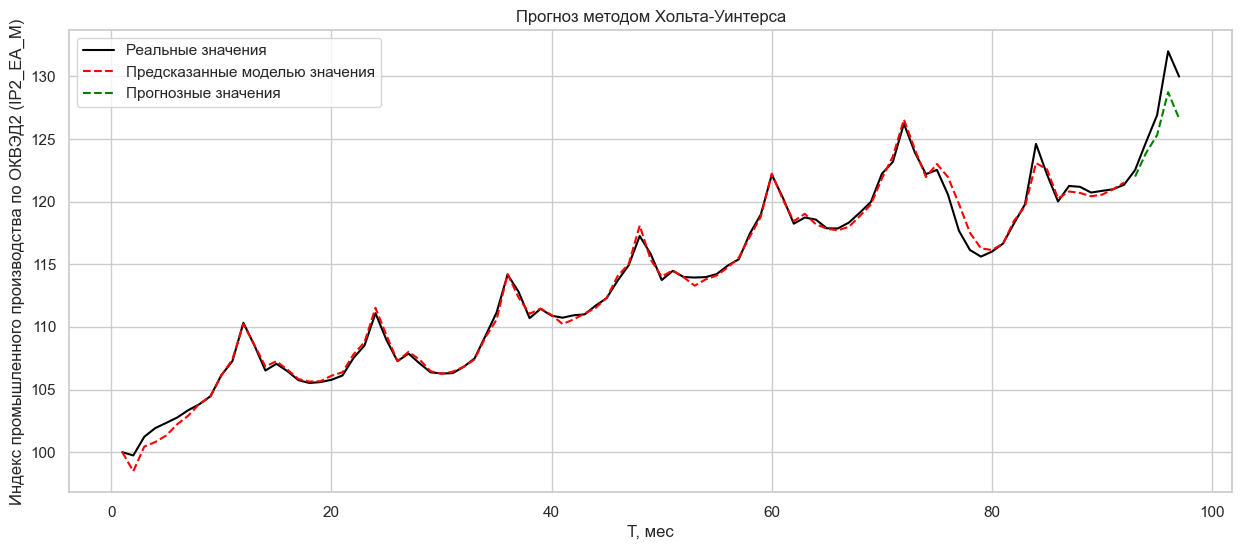

In [62]:
model_4 = tsa.holtwinters.ExponentialSmoothing(train, seasonal_periods=12,
                                                 trend='add', seasonal='mul').fit()
forecast_4 = model_4.forecast(len(y) - len(train))

ax = y.plot(figsize=(15, 6), color = 'black', title="Прогноз методом Хольта-Уинтерса", label='Реальные значения')
model_4.fittedvalues.plot(ax=ax, style='--', color = 'red', label='Предсказанные моделью значения')
forecast_4.plot(ax=ax, style='--', color = 'green', label='Прогнозные значения')
plt.xlabel('T, мес')
plt.ylabel('Индекс промышленного производства по ОКВЭД2 (IP2_EA_M)')
plt.legend();

In [63]:
sum_sq_errors_4 = (np.array(y[len(train):] - forecast_4)**2).sum()
sum_sq_errors_4

25.494476660660688

### Лучшая модель

In [64]:
table = {'Модель по типу функциональной зависимости': ['Аддитивная модель', 'Мультипликативная модель',
                                                       'Модель смешанного типа 1', 'Модель смешанного типа 2'],
        'sum_sq_errors': [sum_sq_errors_1, sum_sq_errors_2, sum_sq_errors_3, sum_sq_errors_4]}

table = pd.DataFrame(table)
table

,Модель по типу функциональной зависимости,sum_sq_errors
0,Аддитивная модель,31.415163
1,Мультипликативная модель,24.743291
2,Модель смешанного типа 1,33.424576
3,Модель смешанного типа 2,25.494477


Отдам предпочтение мультипликативной модели, т.к. это модель с минимальной суммой квадратов отклонений фактических значений уровней от расчетных

In [65]:
# Параметры сглаживания и начальные параметры уровня сглаживания, тренда и сезонности
model_2.params_formatted

,name,param,optimized
smoothing_level,alpha,1.000000e+00,True
smoothing_trend,beta,5.573671e-01,True
smoothing_seasonal,gamma,4.797813e-09,True
initial_level,l.0,8.678481e+01,True
initial_trend,b.0,1.013984e+00,True
initial_seasons.0,s.0,1.136385e+00,True
initial_seasons.1,s.1,1.115484e+00,True
initial_seasons.2,s.2,1.119961e+00,True
initial_seasons.3,s.3,1.111990e+00,True
initial_seasons.4,s.4,1.102437e+00,True


In [66]:
# Уровень сглаживания для каждого периода
model_2.level

1      87.998340
2      89.414082
3      90.388876
4      91.660563
5      92.831151
         ...    
88    108.976594
89    109.507117
90    110.049484
91    110.308799
92    110.395313
Length: 92, dtype: float64

In [67]:
# Оценка тренда для каждого периода
model_2.trend

1     1.013984
2     1.015157
3     1.012785
4     1.013501
5     1.013094
        ...   
88    1.005561
89    1.005175
90    1.005051
91    1.003549
92    1.002008
Length: 92, dtype: float64

In [68]:
# Оценка сезонности для каждого периода
model_2.season

1     1.136385
2     1.115484
3     1.119961
4     1.111990
5     1.102437
        ...   
88    1.111990
89    1.102437
90    1.098231
91    1.096810
92    1.099234
Length: 92, dtype: float64

# № 5
**Выделение компонент тренд-сезонного временного ряда. \
Метод Четверикова: По заданным значениям временного ряда y_t выделить компоненты временного ряда: тренд f_t, сезонную компоненту S_t и остаточную последовательность ε_t.** 

**Построить следующие диаграммы:** 
1. Исходный ряд, тренды: предварительный, первый и второй. 
2. Сезонную волну: первую и вторую. 
3. Остаточную компоненту.

# Метод Четверикова 

In [69]:
#1 этап
T = 12
n = 97
t = 7
mean_hron_12 = []
for i in range(t, len(y_start)-t+2):
    a = y_start[i-T/2]/2
    b = sum(y_start[int(i-T/2):int(i+T/2-1)])
    c = y_start[i+T/2]/2
    mean_hron_12.append((a+b+c)/T)
#Предварительная оценка тренда
mean_hron_12

[107.11250000000001,
 107.15833333333332,
 107.23333333333333,
 107.29166666666667,
 107.22083333333332,
 107.17916666666667,
 107.19166666666666,
 107.23333333333333,
 107.28750000000001,
 107.31666666666668,
 107.3583333333333,
 107.34166666666665,
 107.25416666666668,
 107.30000000000001,
 107.42916666666667,
 107.47083333333332,
 107.49166666666667,
 107.57083333333333,
 107.64583333333333,
 107.7625,
 107.97083333333332,
 108.22916666666667,
 108.62499999999999,
 109.07916666666667,
 109.57083333333334,
 109.93333333333334,
 110.17916666666667,
 110.54583333333333,
 111.01666666666665,
 111.5333333333333,
 111.97916666666667,
 112.42083333333333,
 112.84583333333332,
 113.14583333333336,
 113.3125,
 113.37916666666666,
 113.50833333333333,
 113.75416666666666,
 114.00833333333333,
 114.27083333333333,
 114.56250000000001,
 114.81666666666666,
 115.07916666666665,
 115.37083333333332,
 115.61249999999997,
 115.9875,
 116.47083333333335,
 117.03749999999998,
 117.50416666666666,
 11

In [70]:
Y_ij = y_start[t-1:len(y_start)-t+1]
l_ij = np.array(Y_ij - mean_hron_12)
l_ij

array([-1.4125000000000085, -1.4583333333333144, -0.23333333333333428,
       5.608333333333334, 4.479166666666686, 15.42083333333332,
       -5.891666666666666, -8.733333333333334, 1.9124999999999943,
       -3.2166666666666828, -4.4583333333333, -2.74166666666666,
       -1.3541666666666714, -0.8000000000000114, 0.07083333333332575,
       5.629166666666677, 5.008333333333326, 13.82916666666668,
       -7.245833333333323, -7.262500000000003, 2.32916666666668,
       -4.229166666666671, -5.124999999999986, -3.17916666666666,
       -3.1708333333333343, -1.13333333333334, 0.020833333333328596,
       6.05416666666666, 7.4833333333333485, 14.766666666666694,
       -4.679166666666674, -10.120833333333337, 1.5541666666666885,
       -4.445833333333354, -3.2125000000000057, -1.67916666666666,
       -2.2083333333333286, 0.7458333333333371, 0.6916666666666771,
       5.029166666666669, 5.237499999999983, 11.783333333333331,
       -4.979166666666657, -9.970833333333317, 1.787500000000037,


In [71]:
#2 этап
sigma_i = ((sum(l_ij**2) - sum(l_ij)**2 / T)/(T - 1))**0.5
sigma_i

18.86603133787572

In [72]:
l_ij_norm = l_ij/sigma_i
l_ij_norm

array([-0.07487001238910554, -0.07729942282060896, -0.012367907651297645,
       0.2972714946186887, 0.23741965580616017, 0.8173861824545064,
       -0.3122896681952642, -0.4629131149485672, 0.10137267164188533,
       -0.17050044119288912, -0.23631537833729158, -0.14532291490274638,
       -0.07177803547628094, -0.042404254804449495, 0.0037545433941435107,
       0.298375772087555, 0.26546830351535156, 0.7330193838331563,
       -0.3840677036715444, -0.3849511256466378, 0.12345822101920348,
       -0.22416832617976915, -0.27165225734099996, -0.16851274174892938,
       -0.16807103076138344, -0.06007269430630295, 0.0011042774688656055,
       0.3209030324524176, 0.39665646681661654, 0.7827118699321206,
       -0.2480207195072718, -0.5364579943750334, 0.08237909917739407,
       -0.23565281185597492, -0.1702795856991154, -0.0890047639905877,
       -0.11705341169978055, 0.03953313338539787, 0.036662011966347,
       0.2665725809842179, 0.2776153556728755, 0.6245793363905284,
       -0.2

In [73]:
#3 этап
# Первая средняя сезонная волна
S_j_1 = np.sum(l_ij_norm)/len(l_ij_norm)
S_j_1

-0.005131642355317787

In [74]:
#4 этап
# Первая оценка тренда
f_ij_1 = np.array(Y_ij - S_j_1 * sigma_i)
f_ij_1

array([105.7968137254902, 105.7968137254902, 107.0968137254902,
       112.9968137254902, 111.7968137254902, 122.69681372549019,
       101.39681372549019, 98.5968137254902, 109.2968137254902,
       104.19681372549019, 102.9968137254902, 104.69681372549019,
       105.9968137254902, 106.5968137254902, 107.5968137254902,
       113.19681372549019, 112.5968137254902, 121.4968137254902,
       100.4968137254902, 100.5968137254902, 110.39681372549019,
       104.0968137254902, 103.5968137254902, 105.9968137254902,
       106.4968137254902, 108.89681372549019, 110.2968137254902,
       116.69681372549019, 118.5968137254902, 126.39681372549019,
       107.39681372549019, 102.39681372549019, 114.4968137254902,
       108.7968137254902, 110.19681372549019, 111.7968137254902,
       111.39681372549019, 114.5968137254902, 114.7968137254902,
       119.39681372549019, 119.89681372549019, 126.69681372549019,
       110.19681372549019, 105.4968137254902, 117.4968137254902,
       112.0968137254902

In [75]:
# 5 этап
smoothed_f_ij_1 = pd.DataFrame(f_ij_1).rolling(window=5, min_periods=1).mean()[0].values
smoothed_f_ij_1[0] = (5 * smoothed_f_ij_1[0] + 2 * smoothed_f_ij_1[1] - smoothed_f_ij_1[2]) / 6
smoothed_f_ij_1[-1] = (5 * smoothed_f_ij_1[-1] + 2 * smoothed_f_ij_1[-2] - smoothed_f_ij_1[-3]) / 6
# Вторая оценка тренда
f_ij_2 = smoothed_f_ij_1
f_ij_2

array([105.7245915 , 105.79681373, 106.23014706, 107.92181373,
       108.69681373, 112.07681373, 111.19681373, 109.49681373,
       108.75681373, 107.23681373, 103.29681373, 103.95681373,
       105.43681373, 104.89681373, 105.57681373, 107.61681373,
       109.19681373, 112.29681373, 111.07681373, 109.67681373,
       109.11681373, 107.41681373, 103.83681373, 104.93681373,
       106.11681373, 105.81681373, 107.05681373, 109.67681373,
       112.19681373, 116.17681373, 115.87681373, 114.29681373,
       113.85681373, 111.89681373, 108.65681373, 109.53681373,
       111.33681373, 111.35681373, 112.55681373, 114.39681373,
       116.01681373, 119.07681373, 118.19681373, 116.33681373,
       115.95681373, 114.39681373, 111.83681373, 112.63681373,
       114.59681373, 114.63681373, 115.71681373, 118.07681373,
       120.27681373, 124.21681373, 123.29681373, 121.79681373,
       120.81681373, 119.37681373, 115.41681373, 116.37681373,
       118.43681373, 118.75681373, 119.85681373, 123.07

In [76]:
# 6 Этап
l_ij_2 = Y_ij - f_ij_2
sigma_i_2 = ((sum(l_ij_2**2) - sum(l_ij_2)**2 / T)/(T - 1))**0.5
l_ij_2_norm = l_ij_2/sigma_i_2
# Вторая средняя сезонная волна
S_j_2 = np.sum(l_ij_2_norm)/len(l_ij_2_norm)
S_j_2

0.014738084483590444

In [77]:
# 7 Этап
epsilon_ij = np.array(l_ij_2 - S_j_2 * sigma_i_2)
epsilon_ij

array([-0.2794313725490184, -0.35165359477124125, 0.5150130718954188,
       4.723346405228762, 2.748346405228767, 10.268346405228764,
       -10.151653594771238, -11.251653594771232, 0.1883464052287508,
       -3.3916535947712476, -0.6516535947712242, 0.3883464052287394,
       0.20834640522876102, 1.3483464052287615, 1.6683464052287404,
       5.228346405228757, 3.0483464052287643, 8.848346405228776,
       -10.931653594771225, -9.431653594771253, 0.9283464052287599,
       -3.6716535947712345, -0.5916535947712503, 0.708346405228761,
       0.028346405228768412, 2.728346405228757, 2.8883464052287535,
       6.668346405228741, 6.048346405228765, 9.868346405228744,
       -8.83165359477123, -12.251653594771232, 0.28834640522877353,
       -3.4516535947712357, 1.1883464052287507, 1.9083464052287638,
       -0.2916535947712532, 2.8883464052287535, 1.888346405228782,
       4.648346405228759, 3.528346405228754, 7.268346405228764,
       -8.351653594771241, -11.191653594771244, 1.188346405

In [78]:
# Коэффициент напряженности сезонной волны
k_i = np.dot(l_ij_2, epsilon_ij)/np.sum(epsilon_ij**2)
k_i

0.9999999999999999

**Выделенные компоненты временного ряда**

In [79]:
pd.DataFrame({'y_t':Y_ij, 'f_t':f_ij_2, 'S_t':l_ij_2_norm, 'e_t':epsilon_ij})

,y_t,f_t,S_t,e_t
7,105.7,105.724592,-0.001422,-0.279431
8,105.7,105.796814,-0.005599,-0.351654
9,107,106.230147,0.044523,0.515013
10,112.9,107.921814,0.287902,4.723346
11,111.7,108.696814,0.173682,2.748346
...,...,...,...,...
87,126.2,124.056814,0.123946,1.888346
88,120.9,123.056814,-0.124734,-2.411654
89,118.9,118.056814,0.048764,0.588346
90,121.4,119.856814,0.089247,1.288346


## Построение диаграмм

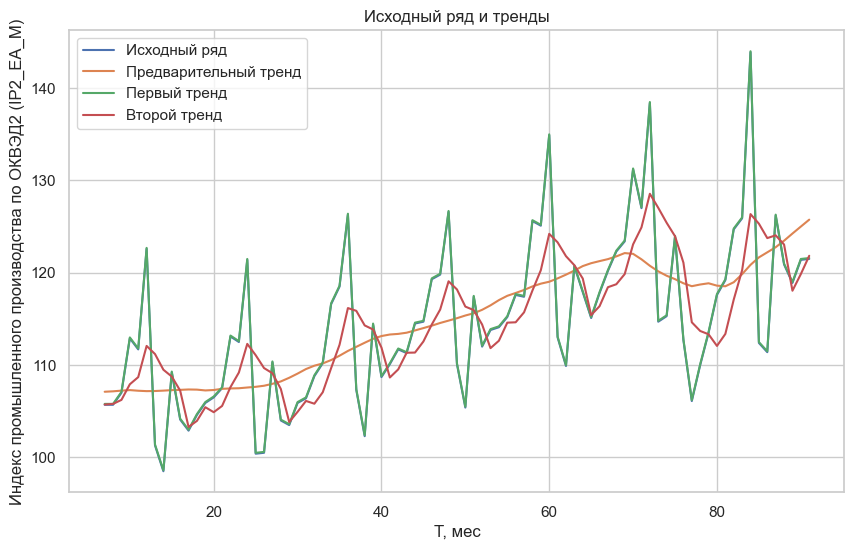

In [80]:
indexes = range(t, len(y_start)-t+2)
plt.figure(figsize=(10, 6))
plt.plot(indexes, np.array(Y_ij), label='Исходный ряд')
plt.plot(indexes, mean_hron_12, label='Предварительный тренд')
plt.plot(indexes, f_ij_1, label='Первый тренд')
plt.plot(indexes, f_ij_2, label='Второй тренд')

plt.title('Исходный ряд и тренды')
plt.xlabel('T, мес')
plt.ylabel('Индекс промышленного производства по ОКВЭД2 (IP2_EA_M)')
plt.legend()
plt.show()

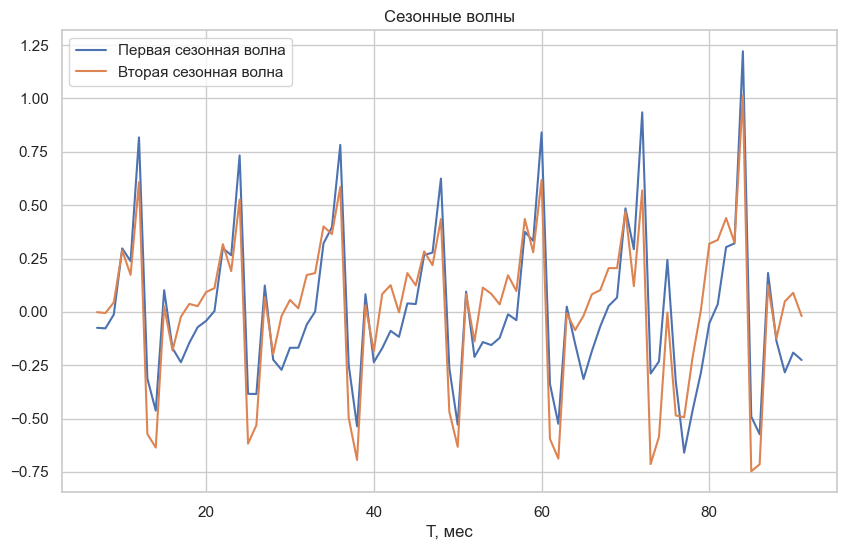

In [81]:
indexes = range(t, len(y_start)-t+2)
plt.figure(figsize=(10, 6))
plt.plot(indexes, l_ij_norm, label='Первая сезонная волна')
plt.plot(indexes, l_ij_2_norm, label='Вторая сезонная волна')

plt.title('Сезонные волны')
plt.xlabel('T, мес')
plt.legend()
plt.show()

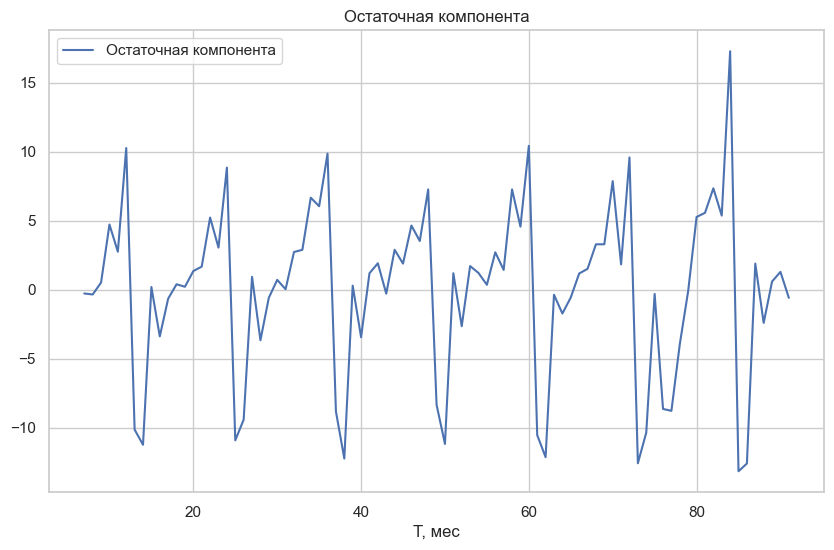

In [82]:
indexes = range(t, len(y_start)-t+2)
plt.figure(figsize=(10, 6))
plt.plot(indexes, epsilon_ij, label='Остаточная компонента')

plt.title('Остаточная компонента')
plt.xlabel('T, мес')
plt.legend()
plt.show()